In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

PREFIX = 'Fig3B.'

In [2]:
# get MAF
susie = pd.read_csv('../../manuscript-intermediate-processing/data/scan-results/joint/cis-eqtl/susie/maf0001/Whole_blood.100.cs.txt', sep='\t')
maf = susie[['variant_id', 'af']].drop_duplicates()
maf['maf'] = np.minimum(maf['af'], 1 - maf['af'])
maf = dict(zip(maf.variant_id, maf.maf))

In [3]:
# load effect sizes, restricting to MAF >= 5% variants
cis_afc = pd.read_csv('../../manuscript-intermediate-processing/work/allelic-fold-change/cis-eqtl/results/afc/Whole_blood.maf0001.txt', sep='\t').rename(columns={'gene_id': 'phenotype_id'})
trans_afc = pd.read_csv('../../manuscript-intermediate-processing/work/allelic-fold-change/trans-eqtl/results/afc/Whole_blood.gene-variant-pairs.txt', sep='\t').rename(columns={'gene_id': 'phenotype_id'})
cis_afc['maf'] = cis_afc.variant_id.map(maf)
cis_afc = cis_afc[cis_afc.maf>=0.05]

In [4]:
cis_and_trans_afc = pd.concat([cis_afc.assign(modality='cis-eQTL'), trans_afc.assign(modality='trans-eQTL')])
cis_and_trans_afc['abs_afc'] = cis_and_trans_afc.afc.abs()
cis_and_trans_afc.head()

,phenotype_id,variant_id,afc,afc_se,maf,modality,abs_afc
0,ENSG00000196072.12,chr10_100278884_G_A,0.139474,0.005259,0.363108,cis-eQTL,0.139474
1,ENSG00000196072.12,chr10_100290485_C_A,0.094499,0.009773,0.068020,cis-eQTL,0.094499
5,ENSG00000107937.19,chr10_1009926_A_T,-0.085036,0.005705,0.125426,cis-eQTL,0.085036
8,ENSG00000107937.19,chr10_1019517_T_A,0.042941,0.008583,0.050356,cis-eQTL,0.042941
9,ENSG00000107937.19,chr10_988472_C_T,-0.038282,0.005704,0.129610,cis-eQTL,0.038282


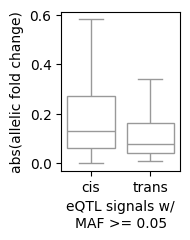

In [5]:
fig, ax = plt.subplots(figsize=(2, 2.5))

cis_and_trans_afc['label'] = cis_and_trans_afc.modality.str.replace('-eQTL', '')

sns.boxplot(x='label', y='abs_afc', data=cis_and_trans_afc, ax=ax, showfliers=False, color='white')
ax.set_xlabel('eQTL signals w/\nMAF >= 0.05')
ax.set_ylabel('abs(allelic fold change)')

fig.tight_layout()
fig.savefig(f'figures/{PREFIX}png', dpi=300, bbox_inches='tight', facecolor='white')